In [1]:
import pickle
import pandas as pd
import numpy as np

In [2]:
aspects = pickle.load(open("../pickled_files/primanti_aspect.pkl", 'rb'))
terms = pickle.load(open("../pickled_files/primanti_terms.pkl", 'rb'))

In [3]:
aspects_df = pd.DataFrame(aspects).T

In [4]:
aspects_df

,neg,pos
ambience,250.5000,569.750000
food,1298.3125,2873.828125
price,48.5000,189.687500
service,263.3750,459.000000
misc,94.4375,123.125000


In [5]:
aspects_df["total"] = aspects_df.neg+aspects_df.pos
aspects_df['pos_norm'] = aspects_df.pos/aspects_df.total
aspects_df['neg_norm'] = aspects_df.neg/aspects_df.total

In [6]:
aspects_df

,neg,pos,total,pos_norm,neg_norm
ambience,250.5000,569.750000,820.250000,0.694605,0.305395
food,1298.3125,2873.828125,4172.140625,0.688814,0.311186
price,48.5000,189.687500,238.187500,0.796379,0.203621
service,263.3750,459.000000,722.375000,0.635404,0.364596
misc,94.4375,123.125000,217.562500,0.565929,0.434071


In [7]:
pos = aspects_df.pos_norm.tolist()
neg = aspects_df.neg_norm.tolist()

In [8]:
for i in range(len(pos)):
    pos[i] = pos[i]*100
    neg[i]= neg[i]*100

In [9]:
import matplotlib.pyplot as plt

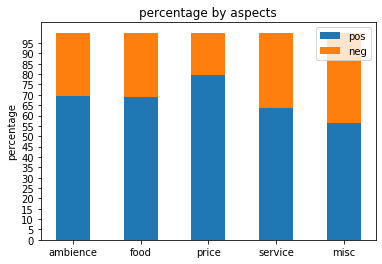

In [10]:
ind = np.arange(5)
width = 0.5       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, pos, width)
p2 = plt.bar(ind, neg, width,
             bottom=pos)

plt.ylabel('percentage')
plt.title('percentage by aspects')
plt.xticks(ind, ('ambience', 'food', 'price', 'service', 'misc'))
plt.yticks(np.arange(0, 100, 5))
plt.legend((p1[0], p2[0]), ('pos', 'neg'))

plt.show()

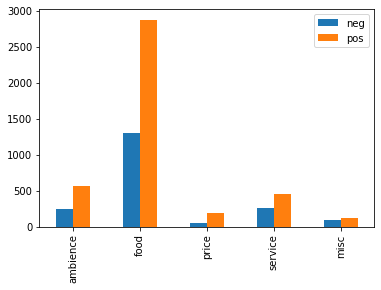

In [11]:
pd.DataFrame(aspects).T.plot(kind='bar')
plt.show()

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import six
def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

In [13]:
from collections import defaultdict

In [14]:
highest = defaultdict()
lowest = defaultdict()
for i in terms:
    if terms[i]:
        highest[i] = terms[i].most_common()[:20]
        lowest[i] = terms[i].most_common()[-10:]

In [15]:
highest_df = pd.DataFrame(highest)
lowest_df = pd.DataFrame(lowest)

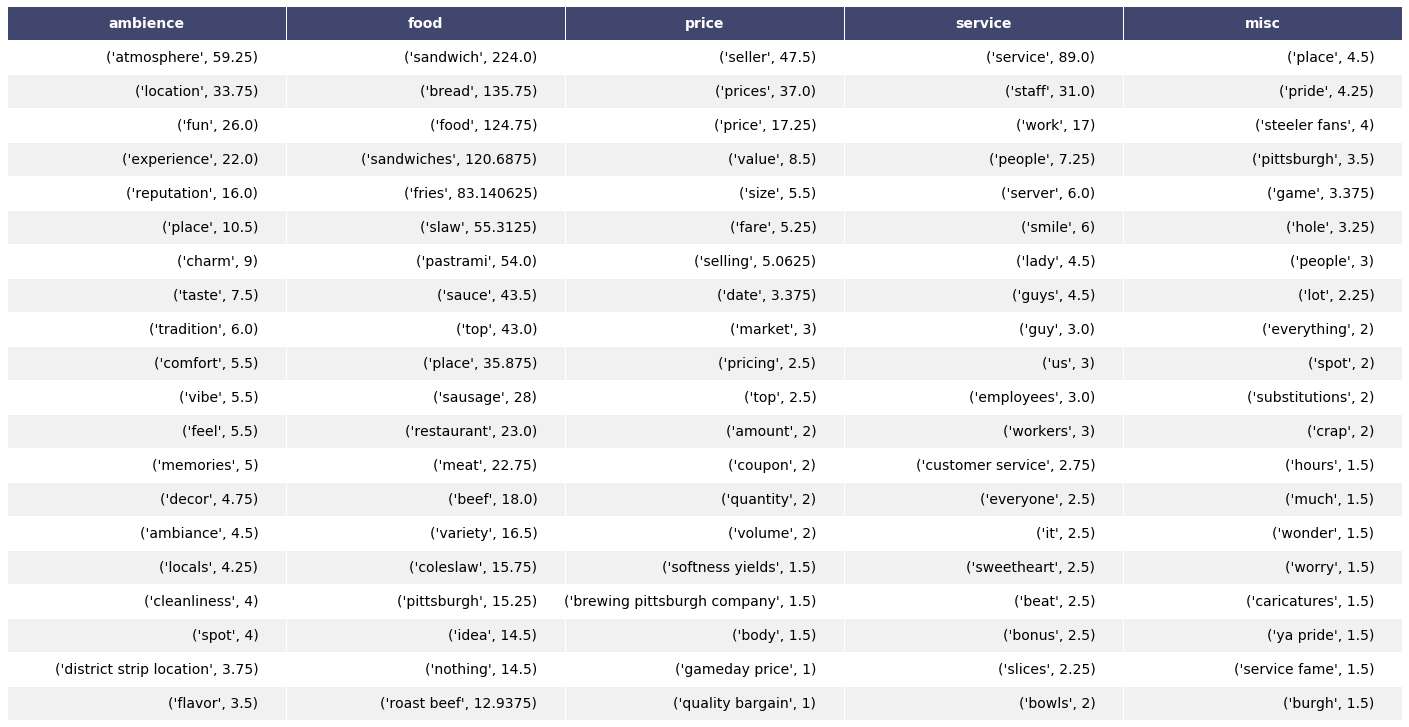

In [16]:
render_mpl_table(highest_df, header_columns=0, col_width=5.0)

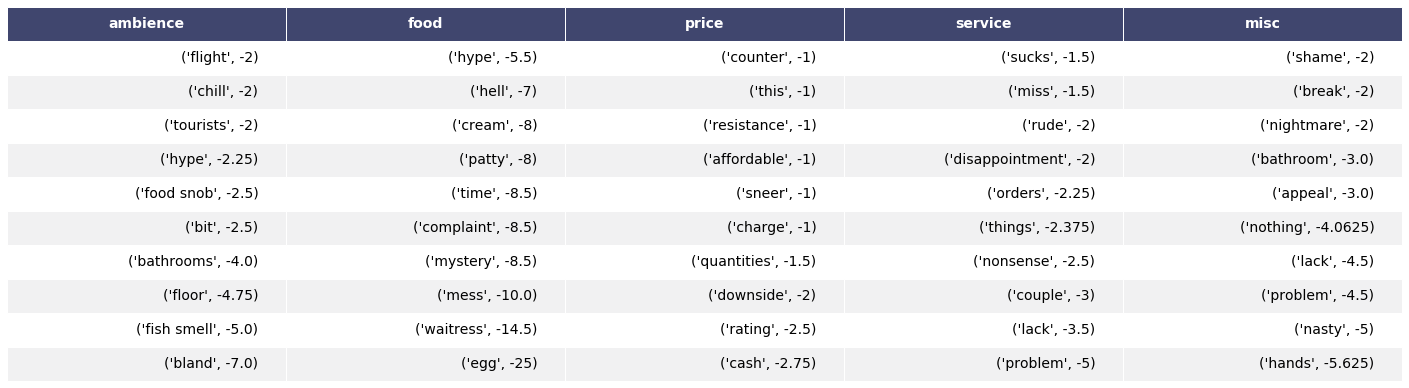

In [17]:
render_mpl_table(lowest_df, header_columns=0, col_width=5.0)